In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in distnce-only mode

In [9]:
ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.843224,1.969860e-12,NaN
2,2,b'SRGe J105825.0+564723',164.604366,56.789762,4.574190,1.817511e-12,NaN
3,3,b'SRGe J110537.6+585120',166.406669,58.855424,0.816664,1.505411e-12,NaN
4,4,b'SRGe J102349.9+563347',155.958041,56.563186,0.797151,1.001123e-12,NaN
...,...,...,...,...,...,...,...
9495,9495,b'SRGe J102315.1+561957',155.813071,56.332561,4.828206,1.637604e-15,NaN
9496,9496,b'SRGe J102332.5+562524',155.885436,56.423270,3.936292,1.608667e-15,NaN
9497,9497,b'SRGe J102235.0+561919',155.645874,56.321872,3.697835,1.595806e-15,NaN
9498,9498,b'SRGe J102223.5+562357',155.597875,56.399058,4.029289,1.532857e-15,NaN


In [4]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
**nway_args
)

    adding angular separation columns
matching: 152204 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:02<00:00, 3402.57it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...
    adding angular separation columns
matching: 112369 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:02<00:00, 3462.74it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...



For a false detection rate of <1%
--> use only counterparts with p_any>0.89 (13.54% of matches)

For a false detection rate of <3%
--> use only counterparts with p_any>0.84 (25.52% of matches)

For a false detection rate of <5%
--> use only counterparts with p_any>0.81 (33.22% of matches)

For a false detection rate of <10%
--> use only counterparts with p_any>0.75 (48.55% of matches)
The efficiency is 75.68%
The purity is  75.31%


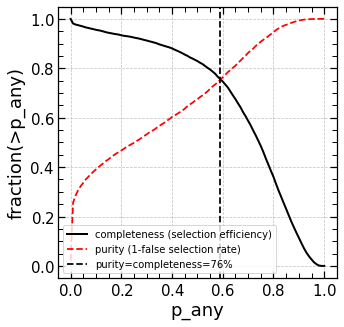

In [5]:
nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random);

## Asses the performance of the NWAY with validation catalog (CSC)

In [6]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway_distance_only.pkl')

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 84% 
 Purity = 0.85% 
 prob_has_match cutoff =  63 
 Fraction of sources with prob_has_match > 0.63 = 72%
+++Statistics+++
687 sources In validation set
Out of those, 107 sources were assigned hostless (prob_has_match < 0.63) 
580 sources have prob_has_match > 0.63
Out of those 580, 
 491 sources have correct nway counterpart
 89 sources have incorrect nway counterpart


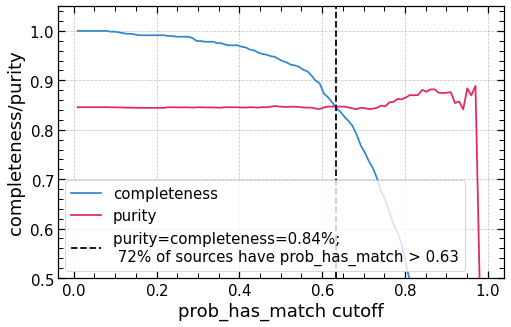

In [7]:
validation_df, p_any_cutoff = assess_goodnes_nway_cross_match(nway_res_ero)

NWAY results for Source 9295:

It is uncertain if this source has a counterpart (p_any=0.75)

Assuming it has a counterpart, we have the following possible associations:

Association 1**[match_flag==1]: probability p_i=0.87 
     Separation: 1.21
     Involved catalogues:   

Association 2: probability p_i=0.13 
     Separation: 7.11
     Involved catalogues:   

Association 3: probability p_i=0.00 
     Separation: 18.18
     Involved catalogues:   

Association 4: probability p_i=0.00 
     Separation: 19.30
     Involved catalogues:   

Association 5: probability p_i=0.00 
     Separation: 24.84
     Involved catalogues:   

Association 6: probability p_i=0.00 
     Separation: 25.33
     Involved catalogues:   

Association 7: probability p_i=0.00 
     Separation: 25.80
     Involved catalogues:   

Association 8: probability p_i=0.00 
     Separation: 26.54
     Involved catalogues:   

Disclaimer: These results assume that the input (sky densities, positional errors, and priors)

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,col_gr,col_rz,col_gz,col_zw1,col_rw2,col_w1w2,col_zw3,col_rw4,col_w3w4,prior_type,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz,mag_g_orig,mag_r_orig,mag_z_orig,mag_w1_orig,mag_w2_orig,mag_w3_orig,mag_w4_orig,desi_pos_err
139839,9295,1508098,1.210600,1.210600,2,9.797983,9.797983,7.242637e-01,7.242637e-01,1,0.750803,8.718073e-01,b'SRGe J104939.7+590758',162.415404,59.132889,3.575543,3.045832e-15,b'9011_615261_3079',b'9011_615261_3064',162.414824,59.132733,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.000000,0.525841,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.0,-99.000000,0.402170,-99.0,b'grzw1w2',-99.0,0.040371,-99.000000,24.056270,22.426155,21.130579,20.259441,21.280754,NaN,18.404451,0.1
139836,9295,64018,7.107819,7.107819,2,8.965417,8.965417,2.786147e-01,2.786147e-01,0,0.750803,1.281900e-01,b'SRGe J104939.7+590758',162.415404,59.132889,3.575543,3.045832e-15,b'9011_615261_3079',b'9011_615261_3079',162.417364,59.134588,-99.0,-99.0,-99.0,-99.000000,-99.0,0.505964,-99.000000,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.0,0.165642,-99.000000,-99.0,b'grzw1w2',-99.0,0.969380,-99.000000,19.867153,19.650473,19.365173,19.215338,19.114890,17.708755,NaN,0.1
139837,9295,625324,18.181535,18.181535,2,4.212483,4.212483,6.821806e-06,6.821806e-06,0,0.750803,2.264227e-06,b'SRGe J104939.7+590758',162.415404,59.132889,3.575543,3.045832e-15,b'9011_615261_3079',b'9011_615261_3041',162.410445,59.137252,-99.0,-99.0,-99.0,0.652917,-99.0,-99.000000,-99.000000,-99.0,-99.0,-99.0,-0.025913,-99.0,-99.0,-99.000000,-99.000000,-99.0,b'grz',-99.0,-99.000000,0.344877,23.081550,22.583761,22.592955,22.852089,NaN,NaN,NaN,0.1
139842,9295,2251798,19.296248,19.296248,2,3.503448,3.503448,1.333113e-06,1.333113e-06,0,0.750803,4.424715e-07,b'SRGe J104939.7+590758',162.415404,59.132889,3.575543,3.045832e-15,b'9011_615261_3079',b'9011_615261_3008',162.405263,59.134178,-99.0,-99.0,-99.0,-99.000000,-99.0,0.554231,-99.000000,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.0,0.327649,-99.000000,-99.0,b'grzw1w2',-99.0,0.130768,-99.000000,25.614578,23.805310,22.674578,20.695738,20.947582,19.398088,NaN,0.1
139843,9295,2308340,24.836319,24.836319,2,-0.646142,-0.646142,9.446632e-11,9.446632e-11,0,0.750803,3.135412e-11,b'SRGe J104939.7+590758',162.415404,59.132889,3.575543,3.045832e-15,b'9011_615261_3079',b'9011_615261_3030',162.409171,59.126776,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.000000,0.491256,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.0,-99.000000,0.809754,-99.0,b'grzw1w2',-99.0,0.112889,-99.000000,26.165638,25.291492,22.959625,20.627811,21.154781,NaN,17.193954,0.1
139841,9295,1804769,25.332566,25.332566,2,-1.068677,-1.068677,3.570607e-11,3.570607e-11,0,0.750803,1.185113e-11,b'SRGe J104939.7+590758',162.415404,59.132889,3.575543,3.045832e-15,b'9011_615261_3079',b'9011_615261_3004',162.404845,59.128399,-99.0,-99.0,-99.0,-99.000000,-99.0,0.640730,-99.000000,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.0,0.051135,-99.000000,-99.0,b'grzw1w2',-99.0,0.039168,-99.000000,24.364285,23.750834,22.936895,22.204567,22.186773,22.425549,NaN,0.1
139838,9295,629821,25.804513,25.804513,2,-1.478278,-1.478278,1.390406e-11,1.390406e-11,0,0.750803,4.614867e-12,b'SRGe J104939.7+590758',162.415404,59.132889,3.575543,3.045832e-15,b'9011_615261_3079',b'9011_615261_3040',162.410413,59.139584,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.0,b'grzw1w2',-99.0,0.054199,-99.000000,23.089678,21.639452,20.793592,20.280620,20.943872,NaN,NaN,0.1
139840,9295,1610408,26.544616,26.544616,2,-2.135833,-2.135833,3.059047e-12,3.059047e-12,0,0.750803,1.015322e-12,b'SRGe J104939.7+590758',162.415404,59.132889,3.575543,3.045832e-15,b'9011_615261_3079',b'9011_615261_2976',162.401158,59.133862,-99.0,-99.0,-99.0,-99.00000

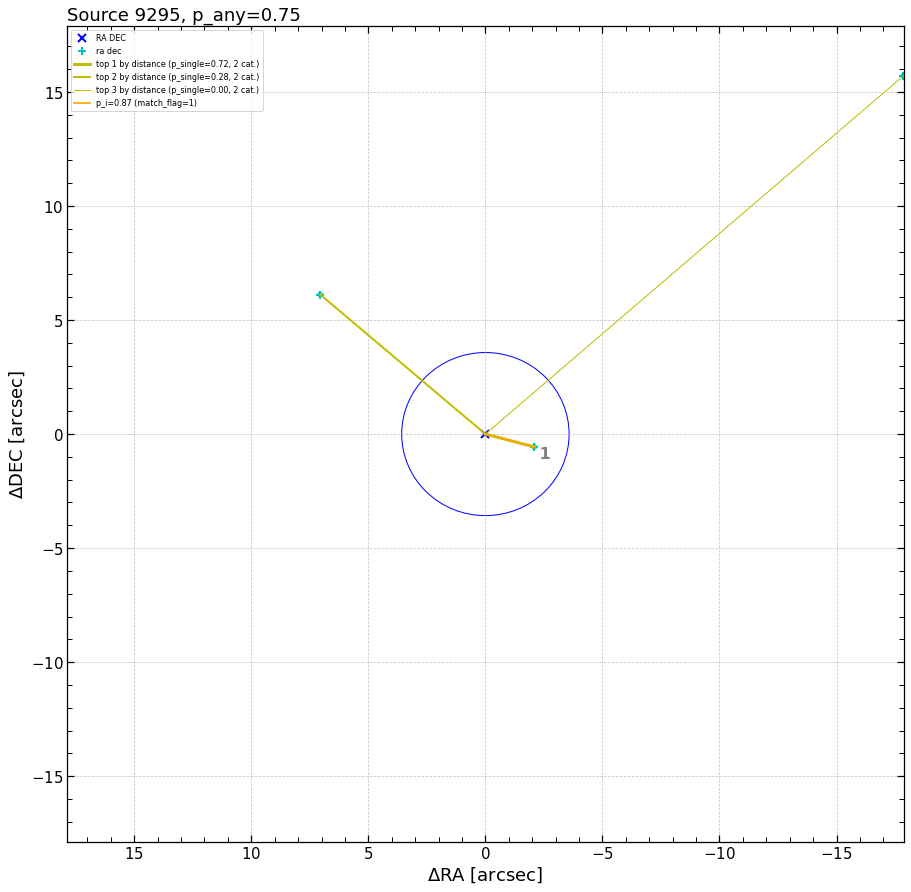

In [8]:
nway.explain(nway_res_ero, id = 9295, primary_id_col = 'EROSITA', cols_ra = ['RA', 'ra'], cols_dec=['DEC', 'dec'], cols_err = ['pos_err', 'desi_pos_err'],
tablenames = ['EROSITA', 'DESI'])